# Projet 4 Energy : Anticipez les besoins en consommation de bâtiments

## Introduction

L'objectif de ces notebooks est donc de trouver l'algorithme le plus adapté pour répondre à notre problématique. Pour ce faire, nous allons ici tester différents de ces algorithmes pour nous en rendre compte. Nous chercherons également à évaluer l'importance des variables.

#### Importation des librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

#### Importation du fichier à étudier

In [2]:
data = pd.read_csv("non_residential_df.csv")
data

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,ComplianceStatus_Compliant,ComplianceStatus_Error - Correct Default Data,ComplianceStatus_Missing Data,ComplianceStatus_Non-Compliant,DefaultData_False,DefaultData_True
0,0.096759,1.206764,-0.080040,-0.206828,-1.066654,-0.05759,1.200788,-0.102292,-0.305192,-0.061630,...,0,0,0,0,1,0,0,0,1,0
1,0.096759,1.206764,-0.059896,-0.041603,1.041378,-0.05759,1.048382,-0.051390,0.051252,-0.061391,...,0,0,0,0,1,0,0,0,1,0
2,0.096759,1.206764,-0.044113,-0.211304,0.216496,-0.05759,5.620550,2.816492,4.349551,2.299847,...,0,0,0,0,1,0,0,0,1,0
3,0.096759,1.206764,-0.040168,-0.151889,-1.097206,-0.05759,0.895977,-0.193501,-0.305192,-0.157060,...,0,0,0,0,1,0,0,0,1,0
4,0.098851,1.206764,-0.047851,-0.307753,0.552559,-0.05759,2.115222,0.190859,1.161852,0.026873,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,-10.161182,-1.075933,-1.014131,0.869573,0.858071,-0.05759,-0.475674,-0.358420,-0.305192,-0.329609,...,0,0,0,0,0,1,0,0,0,1
1664,-10.161182,-1.075933,-0.411271,0.410119,1.285788,-0.05759,-0.475674,-0.345954,-0.305192,-0.316566,...,0,0,0,0,1,0,0,0,1,0
1665,-10.161182,1.206764,0.423347,-1.014637,0.369252,-0.05759,-0.475674,-0.355517,-0.305192,-0.326572,...,0,0,0,0,1,0,0,0,1,0
1666,-10.161182,-1.532472,-1.821960,0.349889,0.827520,-0.05759,-0.475674,-0.352342,-0.305192,-0.323250,...,0,0,0,0,1,0,0,0,1,0


#### Vérification : 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Columns: 123 entries, ZipCode to DefaultData_True
dtypes: float64(15), int64(108)
memory usage: 1.6 MB


In [4]:
data.isna().sum()

ZipCode                                          0
CouncilDistrictCode                              0
Latitude                                         0
Longitude                                        0
YearBuilt                                        0
                                                ..
ComplianceStatus_Error - Correct Default Data    0
ComplianceStatus_Missing Data                    0
ComplianceStatus_Non-Compliant                   0
DefaultData_False                                0
DefaultData_True                                 0
Length: 123, dtype: int64

In [5]:
data.describe()

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,ComplianceStatus_Compliant,ComplianceStatus_Error - Correct Default Data,ComplianceStatus_Missing Data,ComplianceStatus_Non-Compliant,DefaultData_False,DefaultData_True
count,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,1.668000e+03,...,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000
mean,1.448349e-16,1.533545e-16,5.158890e-14,-3.085834e-13,3.331202e-15,1.033013e-16,5.111818e-17,5.111818e-17,1.703939e-17,-8.519697e-18,...,0.024580,0.002398,0.000600,0.042566,0.928058,0.052758,0.008393,0.010791,0.947242,0.052758
std,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,...,0.154889,0.048926,0.024485,0.201937,0.258470,0.223617,0.091257,0.103350,0.223617,0.223617
min,-1.016118e+01,-1.532472e+00,-2.427313e+00,-3.211389e+00,-1.891537e+00,-3.990300e-01,-6.280792e-01,-3.618146e-01,-3.051921e-01,-3.600818e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.707290e-02,-1.075933e+00,-6.353964e-01,-4.221118e-01,-9.750009e-01,-5.758984e-02,-4.756736e-01,-3.006158e-01,-3.051921e-01,-2.726586e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.759573e-02,-1.628543e-01,-7.713264e-02,-1.111119e-03,9.429111e-02,-5.758984e-02,-3.232680e-01,-2.339708e-01,-3.051921e-01,-2.060817e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9.895507e-02,1.206764e+00,6.981962e-01,4.571221e-01,8.275199e-01,-5.758984e-02,-1.845679e-02,-4.547242e-02,-3.051921e-01,-3.936627e-02,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.070066e-01,1.206764e+00,2.446658e+00,3.022373e+00,1.621851e+00,3.750082e+01,1.446007e+01,3.095240e+01,1.182414e+01,3.242998e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Comme on peut le voir, nous n'avons aucune valeur nulle, et grâce à la fonction "describe", on peut constater que les données ont bien été normalisées. Nous allons donc pouvoir passer au test des différents algorithmmes.

### Test des différents algorythmes :

In [6]:
# Import des bibliothèques nécessaires

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import time 
from sklearn.model_selection import RandomizedSearchCV

#### Random Forest

In [7]:
# Paramètres à tester pour Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Sélection de la variable cible
X_energy = data.drop(['SiteEnergyUse(kBtu)','TotalGHGEmissions'], axis=1)
y_energy = data['SiteEnergyUse(kBtu)']

# Partitionnement des données
X_energy_train, X_energy_test, y_energy_train, y_energy_test = train_test_split(X_energy, y_energy, test_size=0.2, random_state=42)

# Modèle Random Forest
model_energy_rf = RandomForestRegressor(random_state=42)

# Utilisation de RandomizedSearchCV 
random_search_rf = RandomizedSearchCV(model_energy_rf, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Mesure du temps d'ajustement du modèle pour Random Forest
start_time_rf = time.time()

random_search_rf.fit(X_energy_train, y_energy_train)

# Mesure du temps écoulé pour Random Forest
elapsed_time_rf = time.time() - start_time_rf
print("Temps d'ajustement du modèle (Random Forest pour SiteEnergyUse(kBtu)):", elapsed_time_rf, "secondes")

# Meilleur modèle trouvé par la recherche avec RandomizedSearchCV 
best_model_rf = random_search_rf.best_estimator_

# Mesure des prédictions pour la variable cible avec le meilleur modèle Random Forest
y_energy_pred_rf = best_model_rf.predict(X_energy_test)

# Calcul du RMSE pour Random Forest
rmse_energy_rf = mean_squared_error(y_energy_test, y_energy_pred_rf, squared=False)
print(f"RMSE pour SiteEnergyUse(kBtu) avec Random Forest : {rmse_energy_rf}")

# Calcul du R2 pour Random Forest
r2_energy_rf = best_model_rf.score(X_energy_test, y_energy_test)
print(f"R2 pour SiteEnergyUse(kBtu) avec Random Forest : {r2_energy_rf}")

Temps d'ajustement du modèle (Random Forest pour SiteEnergyUse(kBtu)): 416.3787443637848 secondes
RMSE pour SiteEnergyUse(kBtu) avec Random Forest : 0.5915340840633444
R2 pour SiteEnergyUse(kBtu) avec Random Forest : 0.5680050132648476


In [8]:
display(X_energy.columns)

Index(['ZipCode', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       ...
       'LargestPropertyUseType_Supermarket/Grocery Store',
       'LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient',
       'LargestPropertyUseType_Wholesale Club/Supercenter',
       'LargestPropertyUseType_Worship Facility', 'ComplianceStatus_Compliant',
       'ComplianceStatus_Error - Correct Default Data',
       'ComplianceStatus_Missing Data', 'ComplianceStatus_Non-Compliant',
       'DefaultData_False', 'DefaultData_True'],
      dtype='object', length=121)

### Rappel :

#### Le coefficient de détermination, noté R2, mesure à quel point les valeurs prédites d'un modèle s'ajustent aux valeurs réelles. Il varie de 0 à 1, où 1 indique un ajustement parfait.

#### Le RMSE mesure lui la différence entre les valeurs prédites et les valeurs réelles. Une valeur de 0 pour un RMSE signifierait une prédiction parfaite. Par conséquent plus le RMSE est proche de 0, plus les performances du modèle sont bonnes.


Un RMSE de 0.591 indique donc, que en moyenne, les prédictions du modèle diffèrent d'environ 0.591 unité de la vérité terrain. Ce qui est un résultats moyen. De plus nous obtenons un R2 (Coefficient de détermination) de 0.568 qui suggère que notre modèle explique ègalement moyennement la variabilité de la consommation totale d'énergie.

#### Elasticnet

In [9]:
# Entraînement du modèle pour la variable cible (ElasticNet)
model_energy_en = ElasticNet(random_state=42)

# Paramètres à tester pour ElasticNet
param_dist_en = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9],
}

# Mesure du temps d'ajustement du modèle pour ElasticNet
start_time_en = time.time()

# Utilisation de RandomizedSearchCV
random_search_en = RandomizedSearchCV(model_energy_en, param_distributions=param_dist_en, n_iter=9, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_en.fit(X_energy_train, y_energy_train)

# Temps d'ajustement du modèle
elapsed_time_en = time.time() - start_time_en
print("Temps d'ajustement du modèle (ElasticNet pour SiteEnergyUse(kBtu)):", elapsed_time_en, "secondes")

# Meilleur modèle trouvé par la recherche pour ElasticNet
best_model_en = random_search_en.best_estimator_

# Mesure des prédictions pour la variable cible avec le meilleur modèle ElasticNet
y_energy_pred_en = best_model_en.predict(X_energy_test)

# Calcul du RMSE pour ElasticNet
rmse_energy_en = mean_squared_error(y_energy_test, y_energy_pred_en, squared=False)
print(f"RMSE pour SiteEnergyUse(kBtu) avec ElasticNet : {rmse_energy_en}")

# Calcul du R2 pour ElasticNet
r2_energy_en = best_model_en.score(X_energy_test, y_energy_test)
print(f"R2 pour SiteEnergyUse(kBtu) avec ElasticNet : {r2_energy_en}")

Temps d'ajustement du modèle (ElasticNet pour SiteEnergyUse(kBtu)): 0.9703655242919922 secondes
RMSE pour SiteEnergyUse(kBtu) avec ElasticNet : 0.7184036473652039
R2 pour SiteEnergyUse(kBtu) avec ElasticNet : 0.36282868372127586


Pour cette itération, les résultats semblent moins satisfaisants, à l'exception du temps d'ajustement du modèle qui lui est favorable. En effet, le RMSE est ici de 0.718, ce qui indique tout de même une assez bonne précision des prédictions du modèle. De plus, le R2 est également inférieur au précédent (0.362), ce qui sous entends que notre modèle explique moins bien la variabilité de la consommation totale d'énergie, mais plus rapidement.

#### Gradient Boosting :

In [10]:
# Paramètres à tester pour le Gradient Boosting
param_dist_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Modèle Gradient Boosting
model_energy_gb = GradientBoostingRegressor(random_state=42)

# Utilisation de RandomizedSearchCV
random_search_gb = RandomizedSearchCV(model_energy_gb, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Mesure du temps d'ajustement du modèle pour le Gradient Boosting
start_time_gb = time.time()

random_search_gb.fit(X_energy_train, y_energy_train)

# Temps d'ajustement du modèle
elapsed_time_gb = time.time() - start_time_gb
print("Temps d'ajustement du modèle (Gradient Boosting pour SiteEnergyUse(kBtu)):", elapsed_time_gb, "secondes")

# Meilleur modèle trouvé par la recherche pour le Gradient Boosting
best_model_gb = random_search_gb.best_estimator_

# Mesure des prédictions pour la variable cible avec le meilleur modèle Gradient Boosting
y_energy_pred_gb = best_model_gb.predict(X_energy_test)

# Calcul du RMSE pour le Gradient Boosting
rmse_energy_gb = mean_squared_error(y_energy_test, y_energy_pred_gb, squared=False)
print(f"RMSE pour SiteEnergyUse(kBtu) avec Gradient Boosting : {rmse_energy_gb}")

# Calcul du R2 pour le Gradient Boosting
r2_energy_gb = best_model_gb.score(X_energy_test, y_energy_test)
print(f"R2 pour SiteEnergyUse(kBtu) avec Gradient Boosting : {r2_energy_gb}")

Temps d'ajustement du modèle (Gradient Boosting pour SiteEnergyUse(kBtu)): 173.96369862556458 secondes
RMSE pour SiteEnergyUse(kBtu) avec Gradient Boosting : 0.5070137493035728
R2 pour SiteEnergyUse(kBtu) avec Gradient Boosting : 0.6826352897694103


Pour le gradient boosting, les résultats sont meilleurs, avec notamment un RMSE de 0.507, ce qui est encore un peu mieux que pour random forest, et un R2 de 0.682, indiquant un niveau de performance meilleur par rapport aux algorithme précédent même si le temps d'ajustement du modèle est plus long que l'ElasticNet par exemple.

#### SVM : 

In [11]:
from sklearn.svm import SVR

# Paramètres à tester pour SVM
param_dist_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.1, 0.2, 0.5]
}

# Modèle SVM
model_energy_svr = SVR()

# Utilisation de RandomizedSearchCV
random_search_svr = RandomizedSearchCV(model_energy_svr, param_distributions=param_dist_svr, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Mesure du temps d'ajustement du modèle pour SVM
start_time_svr = time.time()

random_search_svr.fit(X_energy_train, y_energy_train)

# Temps d'ajustement du modèle
elapsed_time_svr = time.time() - start_time_svr
print("Temps d'ajustement du modèle (SVM pour SiteEnergyUse(kBtu)):", elapsed_time_svr, "secondes")

# Meilleur modèle trouvé par la recherche pour SVM
best_model_svr = random_search_svr.best_estimator_

# Mesure des prédictions pour la variable cible avec le meilleur modèle SVM
y_energy_pred_svr = best_model_svr.predict(X_energy_test)

# Calcul du RMSE pour SVM
rmse_energy_svr = mean_squared_error(y_energy_test, y_energy_pred_svr, squared=False)
print(f"RMSE pour SiteEnergyUse(kBtu) avec SVM : {rmse_energy_svr}")

# Calcul du R2 pour SVM
r2_energy_svr = best_model_svr.score(X_energy_test, y_energy_test)
print(f"R2 pour SiteEnergyUse(kBtu) avec SVM : {r2_energy_svr}")

Temps d'ajustement du modèle (SVM pour SiteEnergyUse(kBtu)): 3.1702394485473633 secondes
RMSE pour SiteEnergyUse(kBtu) avec SVM : 0.5988728343438732
R2 pour SiteEnergyUse(kBtu) avec SVM : 0.5572196019563809


Pour le SVR, nous obtenons des résultats moins satisfaisants affichant un RMSE de 0.598, ce qui représente  un résultat moyen. Un R2 de 0.557 qui est également un résultat moyen, pour le temps d'ajustement il reste cependant correct. Ce modèle semble donc moyennement bien représenter la variabilité de la consommation totale d'énergie.

### Synthèse des résultats

In [12]:
# Création d'un data frame pour  observer tous les résultats

results = {
    'Modèle': ['Random Forest', 'Gradient Boosting', 'SVM', 'Elastic Net'],
    'RMSE': [rmse_energy_rf, rmse_energy_gb, rmse_energy_svr, rmse_energy_en],
    'R2': [r2_energy_rf, r2_energy_gb, r2_energy_svr, r2_energy_en],
    'Temps d\'ajustement': [elapsed_time_rf, elapsed_time_gb, elapsed_time_svr, elapsed_time_en]
}

df_results = pd.DataFrame(results)

# Visualisation
df_results

,Modèle,RMSE,R2,Temps d'ajustement
0,Random Forest,0.591534,0.568005,416.378744
1,Gradient Boosting,0.507014,0.682635,173.963699
2,SVM,0.598873,0.557220,3.170239
3,Elastic Net,0.718404,0.362829,0.970366


Comme nous l'avons dit précédemment, notre meilleur algorithme dans ce cas précis semble être le Gradient Boosting. Cependant, il est tout de même pertinent de noter les résultats de SVM, qui se révèlent également prometteurs étant donné son temps d'ajustement.

### Evaluation de l'importance des features :

In [13]:
# Pour se faire nous allons installer SHAP:

#utilisation de SHAP : 
!pip install shap

PermutationExplainer explainer: 335it [01:50,  2.90it/s]                         


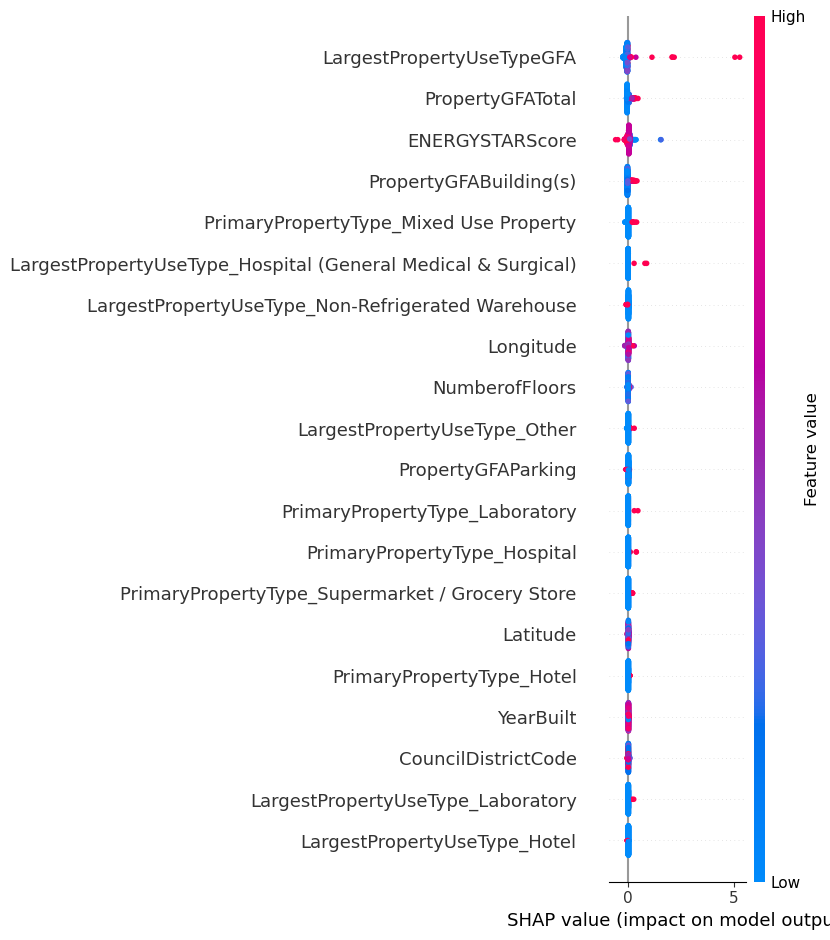

In [14]:
import shap

# Expliquer les prédictions pour le modèle SVM 
explainer = shap.Explainer(best_model_gb.predict, X_energy_train)
shap_values = explainer.shap_values(X_energy_test)

# Visualisation des contributions des features
shap.summary_plot(shap_values, X_energy_test)

Comme illustré sur le graphique, les valeurs SHAP sont présentées pour chaque variable dans leur ordre d'importance. Les points rouges représentent des valeurs élevées de la variable, tandis que les points bleus représentent des valeurs basses.

Les valeurs SHAP positives (points à droite) indiquent une contribution positive d'une variable. Par exemple, le modèle semble utiliser la variable LargestPropertyUseTypeGFA pour prédire des consommation d'énergies élevées.

Cela suggère que le modèle a appris une corrélation positive entre la superficie brute de plancher (SFF) de la plus grande utilisation de la propriété.e sur site avec la consommation d'énergies.

On peut également noter que la variable LargestPropertyUseTypeGFA, étant la plus importante, a un impact positif lorsque sa valeur est élevée comme pour la variable PropertyGFATotal. En revanche, la variable ENERGTSTARScore, la troisiéme, semble en général avoir un impact négatif lorsque sa valeur est plus élevée, même si il est difficile de l'affirmer étant donné un nombre d'information très faible.

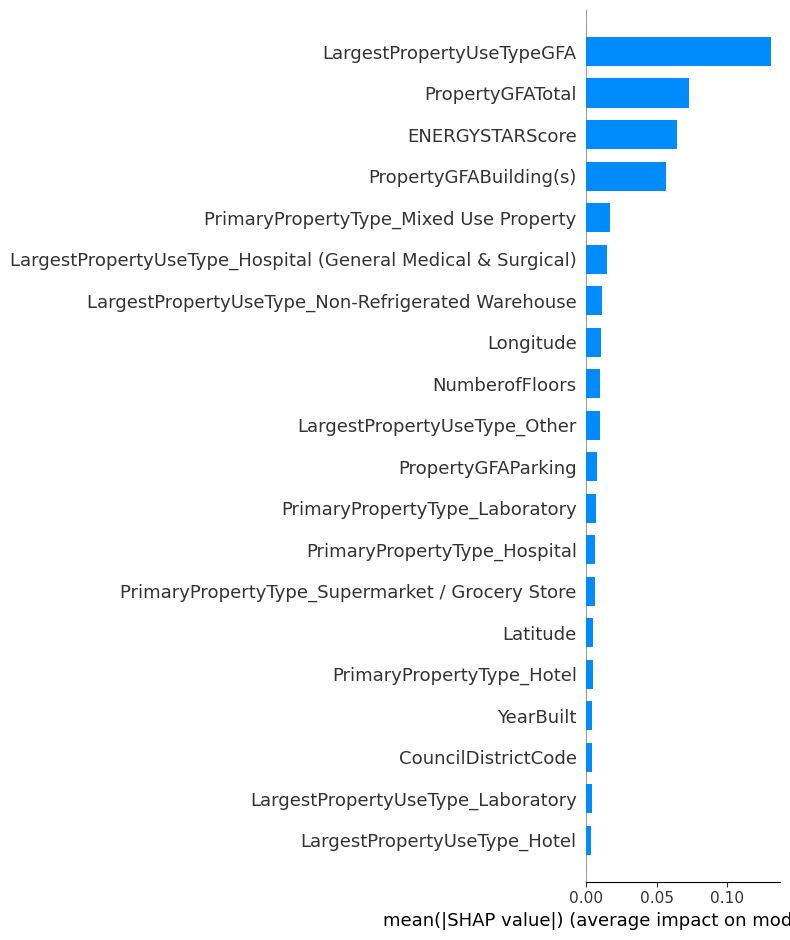

In [15]:
# Nous pouvons également faire une autre visualtisation pour voir clairement l'importance des variables :
# un résumé numérique SHAP
shap.summary_plot(shap_values, X_energy_test, plot_type="bar")

#### Nous pouvons également voir l’importance des variables plus en détail

In [16]:
# Création d'un explainer en utilisant KernelExplainer
explainer = shap.KernelExplainer(best_model_gb.predict, shap.kmeans(X_energy_test, 10))

# Calcul des valeurs SHAP pour le premier échantillon dans l'ensemble de test
shap_values = explainer.shap_values(X_energy_test.iloc[0, :])

# Analyse des valeurs SHAP pour le premier échantillon
feature_names = X_energy_test.columns
shap_dict = dict(zip(feature_names, shap_values))
shap_dict

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "C:\Users\paulm\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.


{'ZipCode': 0.0,
 'CouncilDistrictCode': 0.0024838641478553735,
 'Latitude': 0.006435582431982641,
 'Longitude': 0.009102359677827179,
 'YearBuilt': 0.005835073780949734,
 'NumberofBuildings': 0.0002568837714686902,
 'NumberofFloors': 0.0015521974868994775,
 'PropertyGFATotal': -0.06761714635997944,
 'PropertyGFAParking': 0.005493994334837777,
 'PropertyGFABuilding(s)': -0.0205899964983815,
 'LargestPropertyUseTypeGFA': -0.05451907342630293,
 'ENERGYSTARScore': 0.01663276149740717,
 'Age': -0.0008804827543472544,
 'BuildingType_Campus': 0.0,
 'BuildingType_NonResidential': 0.0,
 'BuildingType_Nonresidential COS': 0.0,
 'BuildingType_Nonresidential WA': 0.0,
 'BuildingType_SPS-District K-12': 0.0,
 'PrimaryPropertyType_Distribution Center': 0.0,
 'PrimaryPropertyType_Hospital': 0.0,
 'PrimaryPropertyType_Hotel': 0.0,
 'PrimaryPropertyType_K-12 School': 0.0,
 'PrimaryPropertyType_Laboratory': 0.0,
 'PrimaryPropertyType_Large Office': 0.0,
 'PrimaryPropertyType_Low-Rise Multifamily': 0.0,

Les SHAP Values mesurent l'impact de chaque fonctionnalité sur les prédictions du modèle.

Ces valeurs fournissent des informations précieuses sur la manière dont elles contribue aux prédictions du modèle. Un SHAP Value positif indique une contribution positive à la prédiction, alors qu'au contraier un SHAP Value négatif indique une contribution négative. De plus nous pouvons également noter que les valeurs plus éloignées de 0 montrent une influence plus forte.

### Analyse de l'importance de la variable EnergystarScore pour la prédiction d’émissions

In [17]:
# Sélection de la variable cible
X_energy_without_energyscore = data.drop(['ENERGYSTARScore','SiteEnergyUse(kBtu)','TotalGHGEmissions'], axis=1)

y_energy = data['SiteEnergyUse(kBtu)']

# Partitionnement des données pour la variable cible
X_energy_train, X_energy_test, y_energy_train, y_energy_test = train_test_split(X_energy_without_energyscore, y_energy, test_size=0.2, random_state=42)

# Paramètres à tester pour le Gradient Boosting
param_dist_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Modèle Gradient Boosting
model_energy_gb = GradientBoostingRegressor(random_state=42)

# Utilisation de RandomizedSearchCV
random_search_gb = RandomizedSearchCV(model_energy_gb, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Mesure du temps d'ajustement du modèle pour le Gradient Boosting
start_time_gb = time.time()

random_search_gb.fit(X_energy_train, y_energy_train)

# Temps d'ajustement du modèle
elapsed_time_without_energyscore = time.time() - start_time_gb
print("Temps d'ajustement du modèle (Gradient Boosting pour SiteEnergyUse(kBtu)):", elapsed_time_without_energyscore, "secondes")

# Meilleur modèle trouvé par la recherche pour le Gradient Boosting
best_model_gb = random_search_gb.best_estimator_

# Mesure des prédictions pour la variable cible avec le meilleur modèle Gradient Boosting
y_energy_pred_gb = best_model_gb.predict(X_energy_test)

# Calcul du RMSE pour le Gradient Boosting
rmse_without_energyscore= mean_squared_error(y_energy_test, y_energy_pred_gb, squared=False)
print(f"RMSE pour SiteEnergyUse(kBtu) avec Gradient Boosting : {rmse_without_energyscore}")

# Calcul du R2 pour le Gradient Boosting
r2_without_energyscore = best_model_gb.score(X_energy_test, y_energy_test)
print(f"R2 pour SiteEnergyUse(kBtu) avec Gradient Boosting : {r2_without_energyscore}")

Temps d'ajustement du modèle (Gradient Boosting pour SiteEnergyUse(kBtu)): 155.63710165023804 secondes
RMSE pour SiteEnergyUse(kBtu) avec Gradient Boosting : 0.5109356256782238
R2 pour SiteEnergyUse(kBtu) avec Gradient Boosting : 0.6777065119724338


In [18]:
# Création d'un DataFrame pour comparer les modèles

model_comparaison = pd.DataFrame({
    'Modèle': ['Avec ENERGYSTARScore', 'Sans ENERGYSTARScore'],
    'RMSE': [rmse_energy_gb,rmse_without_energyscore],
    'R2': [r2_energy_gb, r2_without_energyscore],
    'Temps d\'ajustement (s)': [elapsed_time_gb, elapsed_time_without_energyscore]
})

# Affichage du tableau
model_comparaison

,Modèle,RMSE,R2,Temps d'ajustement (s)
0,Avec ENERGYSTARScore,0.507014,0.682635,173.963699
1,Sans ENERGYSTARScore,0.510936,0.677707,155.637102


De même que pour notre première target, il semble que cette variable ne soit pas indispensable au bon fonctionnement de notre algorithme, même si pour cette target on observe un peu plus de différence. Il semblerait donc que pour éviter le travail fastidieux de notre équipe pour calculer les données de cette variable, nous pourrions nous en passer.

### Conclusion

Pour conclure, nous avons pu tester différents algorithmes à la suite de la préparation de nos données, et nous sommes arrivés à la conclusion suivante : l'algorithme le plus performant selon nos différentes mesures semble être le Gradient Boosting dans les deux cas, même si les résultats sont plus satisfaisants pour la variable 'Emission' que pour la variable 'Energy'.

Nous avons également pu répondre à la question qui nous a été posée sur l'intérêt de l' 'ENERGY STAR Score' pour la prédiction d'émissions. En effet, cette variable ne semble pas nécessaire pour l'obtention des résultats de prédiction. Il pourrait donc être envisageable de la supprimer dans le futur pour éviter les calculs fastidieux.